In [3]:
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
import pandas as pd

In [4]:
FileName = 'Apple'
data = pd.read_excel(FileName+'.xlsx')

In [5]:
data

,상품명,구매자 이름,구매자 평점,리뷰 제목,리뷰 내용,맛 만족도
0,Apple 2021 에어팟 3세대 블루투스 이어폰,임*솜,5,현대인의 필수템 에어팟 추천드립니다!!,☆내돈내산으로 직접 구매하여 남기는 상품평입니다☆✔️제품명: Apple 2021 에...,아주 마음에 들어요
1,Apple 2021 에어팟 3세대 블루투스 이어폰,박경아,5,에어팟 좋아요 제발잊어버리지말고 오래써라,❇️Apple 2021 에어팟 3세대 블루투스 이어폰❇️1️⃣배송:로켓배송*️⃣완전...,아주 마음에 들어요
2,Apple 2021 에어팟 3세대 블루투스 이어폰,윤*이,5,"오픈형태로 귀가답답하지않고, 무선충전 가능한 에어팟!",Apple 2021 에어팟 3세대 블루투스 이어폰총 만족도 ⭐⭐⭐⭐⭐✔ 구매이유현...,아주 마음에 들어요
3,Apple 2021 에어팟 3세대 블루투스 이어폰,코알라영,3,프로살걸 후회되는 이어폰 ㅠㅠ..,"❤️ 저는 에어팟 1세대 , 버즈 , 버즈프로를 사용해 온 사람인데요 이번에 아이폰...",아주 마음에 들어요
4,Apple 2021 에어팟 3세대 블루투스 이어폰,윤*영,5,선물용이라 개봉은 못해봤지만 마음에 들어요~,제가 쓸 제품이 아니라 사진은 포장밖에 못찍었네요.직원 퇴직선물로 준비한건데 너무 ...,아주 마음에 들어요


In [7]:
review = data['리뷰 내용']
review

0    ☆내돈내산으로 직접 구매하여 남기는 상품평입니다☆✔️제품명: Apple 2021 에...
1    ❇️Apple 2021 에어팟 3세대 블루투스 이어폰❇️1️⃣배송:로켓배송*️⃣완전...
2    Apple 2021 에어팟 3세대 블루투스 이어폰총 만족도  ⭐⭐⭐⭐⭐✔ 구매이유현...
3    ❤️ 저는 에어팟 1세대 , 버즈 , 버즈프로를 사용해 온 사람인데요 이번에 아이폰...
4    제가 쓸 제품이 아니라 사진은 포장밖에 못찍었네요.직원 퇴직선물로 준비한건데 너무 ...
Name: 리뷰 내용, dtype: object

In [10]:
reviewSum = data['리뷰 내용'].str.cat()
reviewSum

'☆내돈내산으로 직접 구매하여 남기는 상품평입니다☆✔️제품명: Apple 2021 에어팟 3세대 블루투스 이어폰✔️구매 동기저는 4년 전 에어팟2을 구매해서 지금까지 사용했는데요. 오래 사용하다보니 추운 겨울에 에어팟으로 노래들으려고 하니까 애가 맛탱이가 갔더라구요..ㅠㅠㅠ 마침 제 생일이기도 하고 갖고 싶은 거 생각하다 에어팟 3세대를 선물받게 됐습니다!!✔️장점◾착용감이 편합니다. 제 귀가 작은 편인데 리뷰에 보니까 귀가 작은 사람들은 아플 수도 있다고 하더라구요..? 근데 저는 괜찮았어요! 구매를 망설였던 이유였는데 끼고 있는 걸 깜빡할 정도로 착용감이 편했습니다. 다면 장시간 착용시에는 조금 불편하더라고요..!◾완충 후 배터리 사용 시간이 깁니다. 일주일에 한 번 정도 충전해서 사용하는 것 같아요. 제가 사용량이 그렇게 많지 않아서 그럴 수도 있는데 충전을 자주 깜빡하는 저에게는 너무 좋았습니다!!◾음질이 좋습니다. 노래들을 때도 너무 좋고 통화할 때도 좋았습니다! 친구랑 밖에서 통화하는데 친구가 에어팟인줄 몰랐다고 할 정도 였어요!✔️단점◾유일한 단점은.. 비싸다는 것이겠죠..ㅠ✔️추천여부저는 추천드립니다. 저처럼 이전 에어팟 오래 사용하신 분들 완전 추천드려요!! 공부할 때 집중 잘 되는 음악 틀어놓고 공부하는데 확실히 도움이 되네요!! 내돈내산으로 다른 분들 구매에 도움이 됐으면 하는 마음으로 작성하였습니다. 조금이나마 도움이 되셨다면 <<<도움이 돼요>>> 버튼 부탁드려요:)❇️Apple 2021 에어팟 3세대 블루투스 이어폰❇️1️⃣배송:로켓배송*️⃣완전히 새로워진 AprPods.동적 머리 추적 기술로 구현하는 공간 음향.귀 내부 형태에 맞춰 음질을 조정해주는 적응형 EQ.더욱 길어진 배터리 사용 시간.(한번 충전으로 최대 6시간 청취 가능)여기에 땀과 습기에 강한 방수 기능까지.사뭇 마법같은 경험을 선사 합니다.✅️구매목적재구매했어요ㅜㅇㅜ제가 몇년 전인가 에어팟을 샀었는데 잃어버려서 부모님이 다시는 에어팟 안사주신다고 했는데 에어팟이 진짜 정

In [12]:
# 품사가 명사인 단어만 추출하기
clean_review = re.sub(r'[^가-힣 ]', '', reviewSum)
print(clean_review)

내돈내산으로 직접 구매하여 남기는 상품평입니다제품명   에어팟 세대 블루투스 이어폰구매 동기저는 년 전 에어팟을 구매해서 지금까지 사용했는데요 오래 사용하다보니 추운 겨울에 에어팟으로 노래들으려고 하니까 애가 맛탱이가 갔더라구요 마침 제 생일이기도 하고 갖고 싶은 거 생각하다 에어팟 세대를 선물받게 됐습니다장점착용감이 편합니다 제 귀가 작은 편인데 리뷰에 보니까 귀가 작은 사람들은 아플 수도 있다고 하더라구요 근데 저는 괜찮았어요 구매를 망설였던 이유였는데 끼고 있는 걸 깜빡할 정도로 착용감이 편했습니다 다면 장시간 착용시에는 조금 불편하더라고요완충 후 배터리 사용 시간이 깁니다 일주일에 한 번 정도 충전해서 사용하는 것 같아요 제가 사용량이 그렇게 많지 않아서 그럴 수도 있는데 충전을 자주 깜빡하는 저에게는 너무 좋았습니다음질이 좋습니다 노래들을 때도 너무 좋고 통화할 때도 좋았습니다 친구랑 밖에서 통화하는데 친구가 에어팟인줄 몰랐다고 할 정도 였어요단점유일한 단점은 비싸다는 것이겠죠추천여부저는 추천드립니다 저처럼 이전 에어팟 오래 사용하신 분들 완전 추천드려요 공부할 때 집중 잘 되는 음악 틀어놓고 공부하는데 확실히 도움이 되네요 내돈내산으로 다른 분들 구매에 도움이 됐으면 하는 마음으로 작성하였습니다 조금이나마 도움이 되셨다면 도움이 돼요 버튼 부탁드려요  에어팟 세대 블루투스 이어폰배송로켓배송완전히 새로워진 동적 머리 추적 기술로 구현하는 공간 음향귀 내부 형태에 맞춰 음질을 조정해주는 적응형 더욱 길어진 배터리 사용 시간한번 충전으로 최대 시간 청취 가능여기에 땀과 습기에 강한 방수 기능까지사뭇 마법같은 경험을 선사 합니다구매목적재구매했어요제가 몇년 전인가 에어팟을 샀었는데 잃어버려서 부모님이 다시는 에어팟 안사주신다고 했는데 에어팟이 진짜 정말정말필요해서 구매했어요후기다른 브랜드없는 블루투스 이어폰을 쓰면 연결이 자꾸 되었다가끊기고 불편한데 에어팟은 그런것 없이 정말 잘 사용하고 있어요에어팟 세대는 사봤으니 에어팟 프로를 살까 했는데전에 고무있는 블

In [13]:
# 명사만 추출해 review_N 에 저장
nlp = Okt()
review_N = nlp.nouns(clean_review)
review_N

['돈',
 '산',
 '직접',
 '구매',
 '상품',
 '평',
 '제품',
 '에어팟',
 '세대',
 '블루투스',
 '이어폰',
 '구매',
 '기저',
 '년',
 '전',
 '에어팟',
 '구매',
 '지금',
 '사용',
 '사용',
 '겨울',
 '에어팟',
 '노래',
 '애가',
 '맛',
 '이',
 '마침',
 '제',
 '생일',
 '거',
 '생각',
 '에어팟',
 '세대',
 '선물',
 '장점',
 '착용',
 '감',
 '제',
 '귀가',
 '편',
 '리뷰',
 '보',
 '귀가',
 '사람',
 '수도',
 '저',
 '구매',
 '이유',
 '끼',
 '걸',
 '깜빡',
 '정도',
 '착용',
 '감',
 '장시간',
 '착용',
 '시',
 '조금',
 '완충',
 '후',
 '배터리',
 '사용',
 '시간',
 '일주일',
 '번',
 '정도',
 '충전',
 '사용',
 '것',
 '제',
 '용량',
 '수도',
 '충전',
 '자주',
 '깜빡',
 '저',
 '음질',
 '노래',
 '때',
 '통화',
 '때',
 '친구',
 '밖',
 '통화',
 '친구',
 '에어팟',
 '줄',
 '정도',
 '단점',
 '단점',
 '것',
 '추천',
 '여부',
 '저',
 '추천',
 '저',
 '이전',
 '에어팟',
 '사용',
 '완전',
 '추천',
 '공부',
 '때',
 '집중',
 '음악',
 '공부',
 '도움',
 '돈',
 '산',
 '다른',
 '구매',
 '도움',
 '마음',
 '작성',
 '조금',
 '도움',
 '도움',
 '버튼',
 '에어팟',
 '세대',
 '블루투스',
 '이어폰',
 '배송',
 '로켓',
 '배송',
 '적',
 '머리',
 '추적',
 '기술',
 '구현',
 '공간',
 '음향',
 '귀',
 '내부',
 '형태',
 '음질',
 '조정',
 '적응',
 '더욱',
 '배터리',
 '사용',
 '시간',
 '한번',
 '충전',
 '최대',
 '시

In [14]:
count = Counter(review_N)
count

Counter({'에어팟': 29,
         '세대': 20,
         '프로': 15,
         '사용': 14,
         '구매': 13,
         '저': 13,
         '제': 10,
         '때': 10,
         '이어폰': 8,
         '것': 8,
         '도움': 8,
         '조금': 7,
         '제품': 6,
         '충전': 6,
         '블루투스': 5,
         '착용': 5,
         '음질': 5,
         '추천': 5,
         '기능': 5,
         '가격': 5,
         '노이즈': 5,
         '캔': 5,
         '슬링': 5,
         '선물': 4,
         '시간': 4,
         '단점': 4,
         '마음': 4,
         '후기': 4,
         '더': 4,
         '소리': 4,
         '점': 4,
         '산': 3,
         '평': 3,
         '전': 3,
         '노래': 3,
         '이': 3,
         '생각': 3,
         '장점': 3,
         '감': 3,
         '귀가': 3,
         '정도': 3,
         '통화': 3,
         '친구': 3,
         '공부': 3,
         '다른': 3,
         '귀': 3,
         '또': 3,
         '남편': 3,
         '가장': 3,
         '선택': 3,
         '버즈': 3,
         '소음': 3,
         '느낌': 3,
         '경우': 3,
         '돈': 2,
         '상품

In [27]:
word_count = dict()
for tag, counts in count.most_common(60):
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        print("%s: %d" % (tag, counts))

에어팟: 29
세대: 20
프로: 15
사용: 14
구매: 13
이어폰: 8
도움: 8
조금: 7
제품: 6
충전: 6
블루투스: 5
착용: 5
음질: 5
추천: 5
기능: 5
가격: 5
노이즈: 5
슬링: 5
선물: 4
시간: 4
단점: 4
마음: 4
후기: 4
소리: 4
노래: 3
생각: 3
장점: 3
귀가: 3
정도: 3
통화: 3
친구: 3
공부: 3
다른: 3
남편: 3
가장: 3
선택: 3
버즈: 3
소음: 3
느낌: 3
경우: 3
상품: 2
리뷰: 2
사람: 2
수도: 2


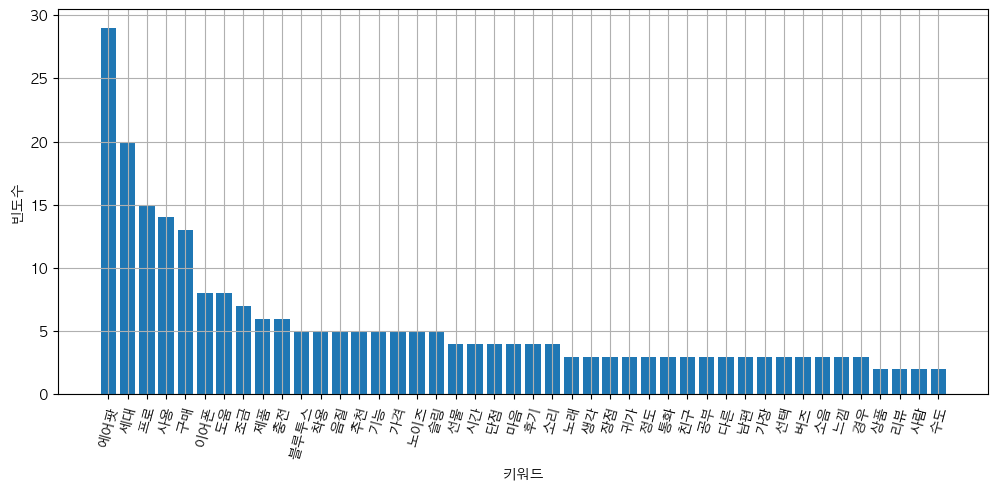

In [28]:
font_path = rc('font', family='AppleGothic')

plt.figure(figsize = (12,5))
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.grid(True)
sorted_Keys = sorted(word_count, key = word_count.get, reverse = True)
sorted_Values = sorted(word_count.values(), reverse = True)
plt.bar(range(len(word_count)), sorted_Values, align = 'center')    # 센터는 디폴트라 생략가능
plt.xticks(range(len(word_count)), list(sorted_Keys), rotation = 75)
plt.show()

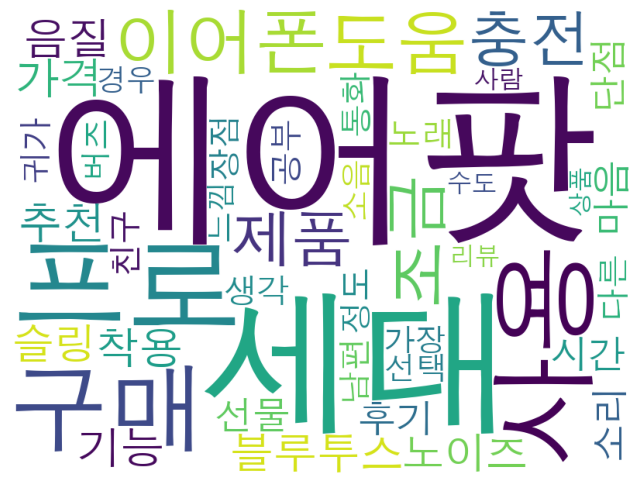

In [30]:
wc = WordCloud("AppleGothic", background_color= 'white', width = 800, height = 600)
cloud = wc.generate_from_frequencies(word_count)
plt.figure(figsize = (8,8))
plt.imshow(cloud)
plt.axis('off')
plt.show()